### Introduction

- In this notebook we are going to deal with a supervised learning problem called regression.
- **Regression** is a classical problem of Machine Learning which considers the target variable to be *continuous* or *real-valued*.

The collected data is from stock market and we are going to use linear regression on it.

### Steps Involved:

1. Importing dataset
2. Exploratory Data Analysis (EDA) and Preprocessing
3. Feature Engineering
4. Model Building
5. Model Training
6. Model Testing
7. Inference
8. Optimization

1. **Importing dataset-** In this notebook we are going to use [pandas](https://pandas.pydata.org/) for loading our dataset. As our dataset is small, pandas works best in our case. For data sized upto Gigs we can use [datatable](https://github.com/h2oai/datatable).

2. **EDA and Preprocessing-** EDA, a crucial step that lets you get friendly with the data. It involves inspection of data through methods of dataframe object, visualization, statistics and hypothesis generation. EDA tells which preprocessing technique to use.
    
    Preprocessing can be defined as a method which makes our data suitable to fit on a machine learning model. Strategies that can be used in preprocessing of data is removing the NaN (missing) values, filling the NaN or impute those values using mean, median or mode, data type of the columns,dropping the unnecessary columns etc.
        
3. **Feature Engineering-** Feature Engineering involves feature selection or feature generation.
    - **Feature selection-** It involves selection of relevant features from the available set of features. The selection can be the entire set of features or a subset of it.
    
    - **Feature generation-** Construction or extraction of new features from the existing features. Useful when we have low set of features. The construction of feature is all mathematical and based on the domain expertise.

4. **Model Building-** In this step the suitable machine learning model is used. The data is divided into train and test set.

5. **Model Training-** Fitting the features into a machine learning model. The value of hyperparameters can use the default value or can be tuned in **Optimization** phase.

6. **Model Testing-** After the model has learned the pattern of data points(features) it is the time to evaluate our model performance. The model is going to be evaluated on a different performance metrics. For a classification problem accuracy, precision, recall, etc. are the evaluation metrics and for a regression problem mean squared error, r^2-score, etc. are the evaluation metrics.

7. **Inference-** We have evaluated our model, its time to generate inference from the saved model.

8. **Optimization-** In this step we tune the hyperparameters or the learned model. The hyperparameters can be tuned by using GridSearch. The learned model can be tuned by using cross-validation technique.

### What is Linear Regression?

Linear Regression is a linear model that tries that makes prediction by simply computing the weight of features including a bias term.

```y = b + w1*x1 + w2*x2 +....+ wn * xn```

### Frameworks used:
- pandas
- matplotlib
- scikit-learn

### 1. Importing dataset

#### Looking for the dataset directory

In [1]:
from glob import glob
files = glob('*')

files

['standard_scale.pkl', 'stocks_regression.pkl', 'Regression.ipynb', 'data']

The dataset is residing in **data** directory.

#### Getting file name

In [2]:
dataset = glob('data/*')

dataset

['data/stocks_test.csv', 'data/stocks.csv']

#### Loading data into DataFrame using pandas.

In [3]:
import pandas as pd

stocks = pd.read_csv('data/stocks.csv')

#### Inspecting first 5 rows of dataset

In [4]:
stocks.head()

,close,date,high,id,low,open,ticker,volume
0,1.13401,2018-12-05 04:24:00,1.13403,19703898,1.1338,1.13400,EURUSD,100
1,1.13385,2018-12-05 04:25:00,1.13400,19703934,1.1338,1.13399,EURUSD,118
2,1.13384,2018-12-05 04:26:00,1.13394,19703958,1.1337,1.13388,EURUSD,63
3,1.13383,2018-12-05 04:27:00,1.13394,19703987,1.1337,1.13383,EURUSD,51
4,1.13370,2018-12-05 04:28:00,1.13390,19704015,1.1336,1.13390,EURUSD,32


**close** is the target variable here.

#### Number of rows and columns in our dataset

In [5]:
stocks.shape

(1440, 8)

**Rows= 1440, Columns= 8**

### 2. Exploratory Data Analysis (EDA) and Preprocessing

**Inspecting the columns datatype and how many of them have null values.**

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
close     1440 non-null float64
date      1440 non-null object
high      1440 non-null float64
id        1440 non-null int64
low       1440 non-null float64
open      1440 non-null float64
ticker    1440 non-null object
volume    1440 non-null int64
dtypes: float64(4), int64(2), object(2)
memory usage: 90.1+ KB


#### Observations:

- None of the columns have null values, all the columns have entries equal to number of rows
- But there is a problem with the datatype of **date** column. It is of type **object** here but it should be of **datetime** type.

In [7]:
# Treating the data type of date column
stocks['date'] = pd.to_datetime(stocks['date'])

#### Dropping the features that are not required
- Columns that contain unique values or a single value are not effective for machine learning models.

In [8]:
print('Feature   Unique Values')
for col in stocks.columns:
    print(col, len(stocks[col].unique()), sep='\t\t')

Feature   Unique Values
close		308
date		1440
high		294
id		1440
low		115
open		316
ticker		1
volume		227


Columns **id** and **ticker** are not effective for our modelling task.

In [9]:
stocks = stocks.drop(['id', 'ticker'], axis=1)

#### Summary statistics

In [10]:
stocks.describe()

,close,high,low,open,volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,1.134370,1.134497,1.134190,1.134379,92.802083
std,0.000766,0.000751,0.000778,0.000768,52.313500
min,1.131500,1.132380,1.131040,1.131940,4.000000
25%,1.134010,1.134110,1.133800,1.134030,57.000000
50%,1.134500,1.134630,1.134400,1.134520,82.000000
75%,1.134870,1.135000,1.134700,1.134890,119.000000
max,1.136020,1.136130,1.135700,1.135960,411.000000


As we can observe from the above table that **close, high, low** and **open** has mean and median nearly equal.

In [11]:
from matplotlib import pyplot as plt

# Changing theme of plot
plt.style.use('ggplot')

### Analyzing the related values

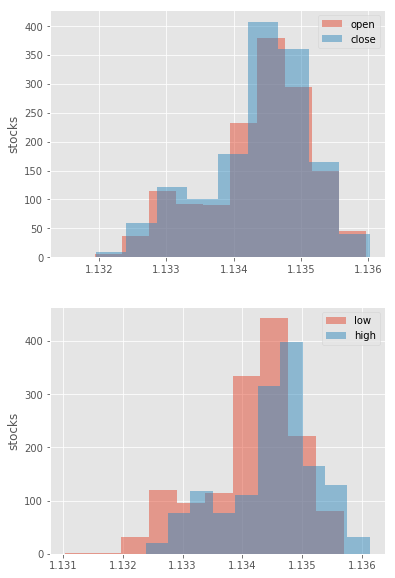

In [12]:
# Customising figure size
plt.rcParams['figure.figsize'] = [6, 10]

def plot_hist(feature1, feature2, transparency1, transparency2):
    plt.hist(stocks[feature1], label=feature1, alpha=transparency1)
    plt.hist(stocks[feature2], label=feature2, alpha=transparency2)
    plt.ylabel('stocks')
    plt.legend()

plt.subplot(2, 1, 1)
plot_hist('open', 'close', 0.5, 0.5)

plt.subplot(2, 1, 2)
plot_hist('low', 'high', 0.5, 0.5)
plt.show()

### Analyzing the volume of stocks traded

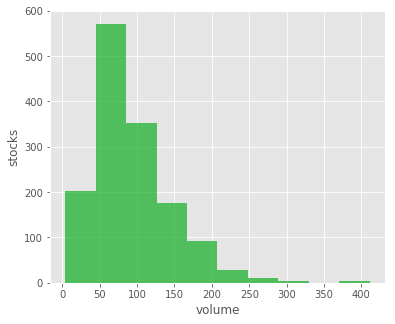

In [13]:
# Customising figure size
plt.rcParams['figure.figsize'] = [6, 5]

plt.hist(stocks['volume'], color='#11ae22', alpha=0.7)
plt.xlabel('volume')
plt.ylabel('stocks')
plt.show()

Stocks are traded more in range 0-200.

### 3. Feature Engineering

#### Converting date to seconds because Linear Regression doesn't work on a time-series data.

In [14]:
from datetime import datetime

stocks['date_to_seconds'] = stocks['date'].apply(lambda x: datetime.timestamp(x))
stocks = stocks.drop('date', axis=1)

In [15]:
stocks.head()

,close,high,low,open,volume,date_to_seconds
0,1.13401,1.13403,1.1338,1.13400,100,1.543964e+09
1,1.13385,1.13400,1.1338,1.13399,118,1.543964e+09
2,1.13384,1.13394,1.1337,1.13388,63,1.543964e+09
3,1.13383,1.13394,1.1337,1.13383,51,1.543964e+09
4,1.13370,1.13390,1.1336,1.13390,32,1.543964e+09


#### Splitting data into train and test set

In [16]:
from sklearn.model_selection import train_test_split

# Features
X = stocks.iloc[:, 1:].values
# Target
y = stocks.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=5)

#### Feature Scaling

The **volume** and **date_to_seconds** have values which are not in the range of other features.

We are going to use StandardScaler because it scales the set of features into a normal distribution.

In [17]:
import pickle
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Scaling the feature
X_train = sc.fit_transform(X_train)
# Transforming the test features
X_test = sc.transform(X_test)

# Saving the learned scaler
sc_pkl = open('standard_scale.pkl', 'wb')
pickle.dump(sc, sc_pkl)
sc_pkl.close()

### 4. Model Building

In [18]:
from sklearn.linear_model import LinearRegression

# Model object
lin_reg = LinearRegression()

### 5. Model Training

In [19]:
# Training the model
lin_reg.fit(X_train, y_train);

# Saving the trained model
model_pkl = open('stocks_regression.pkl', 'wb')
pickle.dump(lin_reg, model_pkl)
model_pkl.close()

### 6. Model Testing

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)

print("Mean Absolute Error= {:6f}".format(mae))
print("Mean Squared Error= {}".format(mse))
print("Variance Score= {:.4f}".format(r2_score))

Mean Absolute Error= 0.000073
Mean Squared Error= 8.209671025415955e-09
Variance Score= 0.9849


### 7. Inference

In [21]:
stocks_test = pd.read_csv('data/stocks_test.csv')
stocks_test.head()

,close,date,high,id,low,open,ticker,volume
0,1.13316,2018-12-06 02:48:00,1.13320,19740046,1.1328,1.13304,EURUSD,145
1,1.13315,2018-12-06 02:49:00,1.13333,19740083,1.1331,1.13310,EURUSD,168
2,1.13341,2018-12-06 02:50:00,1.13341,19740100,1.1331,1.13316,EURUSD,160
3,1.13330,2018-12-06 02:51:00,1.13346,19740136,1.1332,1.13341,EURUSD,107
4,1.13334,2018-12-06 02:52:00,1.13342,19740154,1.1331,1.13334,EURUSD,136


In [22]:
stocks_test.shape

(84, 8)

#### a. Preprocessing the data

In [23]:
stocks_test = stocks_test.drop(['id', 'ticker'], axis=1)
stocks_test['date'] = pd.to_datetime(stocks_test['date'])
stocks_test['date_to_seconds'] = stocks_test['date'].apply(lambda x: datetime.timestamp(x))
stocks_test = stocks_test.drop('date', axis=1)

test_features = stocks_test.iloc[:, 1:].values
target = stocks_test.iloc[:, 0].values

#### b. Looking for the saved pickle files

In [24]:
pkls = glob('*.pkl')

pkls

['standard_scale.pkl', 'stocks_regression.pkl']

#### c. Transforming features using the learned scaler

In [25]:
scaler_pkl = open('standard_scale.pkl', 'rb')
scaler = pickle.load(scaler_pkl)
scaler_pkl.close()

test_features = scaler.transform(test_features)

#### d. Loading the trained model

In [26]:
regressor_pkl = open('stocks_regression.pkl', 'rb')
regressor = pickle.load(regressor_pkl)
regressor_pkl.close()

predicted_values = regressor.predict(test_features)

#### e. Evaluation

In [27]:
print('Mean Squared Error=', mean_squared_error(target, predicted_values))

Mean Squared Error= 1.3098394718597799e-08


### 8. Optimization

No need to optimize this model. It's already performing well.